<a href="https://colab.research.google.com/github/kawata-yuya/Hokkaido-Coronavirus-Positive-Regression-AI/blob/master/main_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/kawata-yuya/Hokkaido-Coronavirus-Positive-Regression-AI
%cd 'Hokkaido-Coronavirus-Positive-Regression-AI'

Cloning into 'Hokkaido-Coronavirus-Positive-Regression-AI'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 4), reused 16 (delta 3), pack-reused 0
Unpacking objects: 100% (21/21), done.
/content/Hokkaido-Coronavirus-Positive-Regression-AI/Hokkaido-Coronavirus-Positive-Regression-AI


In [ ]:
#@title Imports
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

from datetime import date, datetime, timedelta

In [ ]:
#@title Define Functions

class CoronaPredictionNormalScale:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, data):
        self.mean = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)

        self.mean[0], self.std[0] = 4.0, 2.0

    def transform(self, data):
        return (data - self.mean) / self.std

    def dump(self, file_name):
        np.savez(file_name, mean=self.mean, std=self.std)

    def load(self, file_name):
        data = np.load(file_name)

        self.mean = data['mean']
        self.std = data['std']


def create_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(15, )),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer=keras.optimizers.Adam(0.0001, epsilon=1e-2),
        metrics=['mae', 'mse'],
    )

    return model


def plot(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(x, y, label='AI prediction result')

    daysFmt = mdates.DateFormatter('%y-%m-%d')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=8))
    ax.xaxis.set_major_formatter(daysFmt)

    plt.title('Future infected person forecast')
    plt.xlabel('from now on')
    plt.ylabel('infected people')
    plt.legend()
    plt.grid()
    plt.show()

def weekday(d_str):
    d = datetime.strptime(d_str, '%Y-%m-%d')
    return (d.weekday() + 1) % 7 + 1

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               8192      
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_53 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 33        
Total params: 176,577
Trainable params: 176,577
Non-trainable params: 0
_________________________________________________________________
2021-07-21の北海道の感染者予測: 5818.5302734375[人]


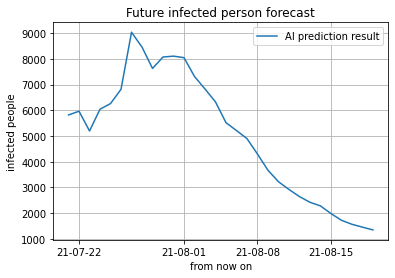

In [25]:
#@title Run

#@markdown 予想する日の日付
expected_day = '2021-07-21'     #@param {type:'date'}
weekday_num = weekday(expected_day)
#@markdown 予想する日の14日前の北海道のコロナウイルス感染者数
data_14 = 34          #@param {type:'integer'}
#@markdown 予想する日の13日前の北海道のコロナウイルス感染者数
data_13 =           67#@param {type:'integer'}
#@markdown 予想する日の12日前の北海道のコロナウイルス感染者数
data_12 =           62#@param {type:'integer'}
#@markdown 予想する日の11日前の北海道のコロナウイルス感染者数
data_11 =           50#@param {type:'integer'}
#@markdown 予想する日の10日前の北海道のコロナウイルス感染者数
data_10 =           64#@param {type:'integer'}
#@markdown 予想する日の09日前の北海道のコロナウイルス感染者数
data_09 =           56#@param {type:'integer'}
#@markdown 予想する日の08日前の北海道のコロナウイルス感染者数
data_08 =           47#@param {type:'integer'}
#@markdown 予想する日の07日前の北海道のコロナウイルス感染者数
data_07 =           60#@param {type:'integer'}
#@markdown 予想する日の06日前の北海道のコロナウイルス感染者数
data_06 =           75#@param {type:'integer'}
#@markdown 予想する日の05日前の北海道のコロナウイルス感染者数
data_05 =           84#@param {type:'integer'}
#@markdown 予想する日の04日前の北海道のコロナウイルス感染者数
data_04 =           73#@param {type:'integer'}
#@markdown 予想する日の03日前の北海道のコロナウイルス感染者数
data_03 = 111          #@param {type:'integer'}
#@markdown 予想する日の02日前の北海道のコロナウイルス感染者数
data_02 = 107          #@param {type:'integer'}
#@markdown 予想する日の01日前の北海道のコロナウイルス感染者数
data_01 = 104          #@param {type:'integer'}

data = [[
        weekday_num,
        data_14,
        data_13,
        data_12,
        data_11,
        data_10,
        data_09,
        data_08,
        data_07,
        data_06,
        data_05,
        data_04,
        data_03,
        data_02,
        data_01,
]]

# 今後の感染者数を予想しグラフに表示をするか。
graph = True        # or False
# 感染者数の予想する日数を設定
compute_range = 30


# 正規化するためのクラスのインスタンスを作成
cpns = CoronaPredictionNormalScale()
# 正規化するための平均値と標準偏差をロード
cpns.load('./model_data/CoronaPredictionNormalScale.npz')

# 重回帰分析に必要なニューるネットワークをインスタンス化
model = create_model()
# 学習済みの重回帰モデルの重みをロード
model.load_weights(
    './model_data/corona_ai_checkpoints/corona_ai_checkpoint'
)

# ニューラルネットワークの入力層、隠れ層、出力層の次元などの情報を表示
"""
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 512)               8192
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33
=================================================================
Total params: 176,577
Trainable params: 176,577
Non-trainable params: 0
_________________________________________________________________
"""
model.summary()

# 入力された計15個のパラメータから、次の北海道のコロナ感染者数を予測
r = model.predict(cpns.transform(data))[0, 0]
# 計算結果を表示
print('{}の北海道の感染者予測: {}[人]'.format(expected_day, r))

if graph:
    y = []
    for i in range(1, compute_range+1):
        expected = model.predict(cpns.transform(data))[0, 0]
        y.append(expected)
        data = [[(data[0][0]) % 7+1] + data[0][2:] + [expected]]

    x = pd.date_range(expected_day, periods=compute_range, freq='d')
    plot(x, y)